In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import csv
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
## Zadanie 1
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

In [3]:
def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    epsilon = 1e-10  # zabezpieczenie przed log(0)
    y_1 = -y * np.log(np.clip(h, epsilon, 1 - epsilon))
    y_0 = -(1 - y) * np.log(np.clip(1 - h, epsilon, 1 - epsilon))
    return (y_1 + y_0).sum() / X.shape[1]


In [4]:
def gradient_descent(X, y, theta, eps, alpha):
    previous_cost = calculate_cost(X, y, theta)
    m = X.shape[1]
    cost_diff = float('inf')
    
    while cost_diff > eps:
        predictions = h_fun(X, theta)
        error = predictions - y

        theta -= alpha * (1 / m) * np.dot(X, error.T)

        current_cost = calculate_cost(X, y, theta)
        cost_diff = abs(current_cost - previous_cost)
        previous_cost = current_cost

    return theta

In [5]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

theta = np.array([[0.],[0.]])
eps = 1e-6
alpha = 0.1

theta = gradient_descent(X, y, theta, eps, alpha)


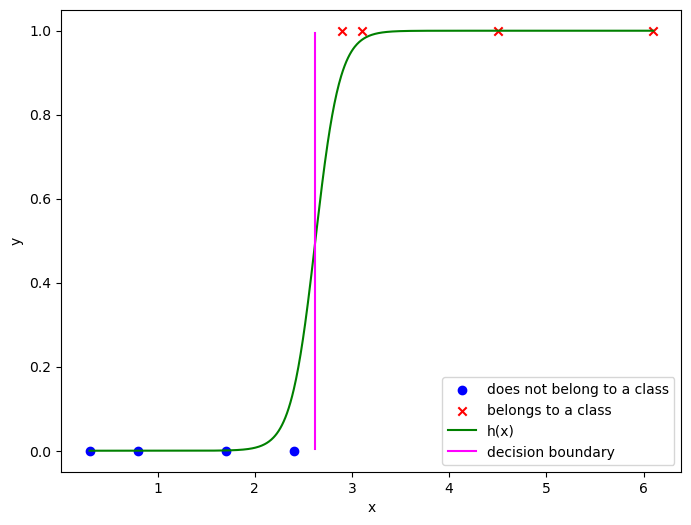

In [ ]:
signz = lambda x,theta : 1 / (1 + np.exp(-(theta[0] + theta[1]*x)))

plt.figure(figsize=(8, 6))

plt.scatter(X[1, y[0] == 0], y[0, y[0] == 0], color='blue', label='does not belong to a class')
plt.scatter(X[1, y[0] == 1], y[0, y[0] == 1], color='red', label='belongs to a class', marker='x')

x = np.linspace(X[1].min(), X[1].max(), 1000)

plt.plot(x, signz(x, theta), 
          color='green', label='h(x)')

decision_boundary = -theta[0] / theta[1]
plt.axvline(x=decision_boundary,ymin=0.05,ymax=0.95, color='magenta', linestyle='-', label='decision boundary')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = "lower right")
plt.show()



In [7]:
## Zad 2

with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}')
print(f'{y.shape=}')



X.shape=(3, 100)
y.shape=(1, 100)


In [8]:
theta = np.array([[0.],[0.],[0.]])
eps = 1e-7
alpha = 0.001
theta = gradient_descent(X, y, theta, eps, alpha)

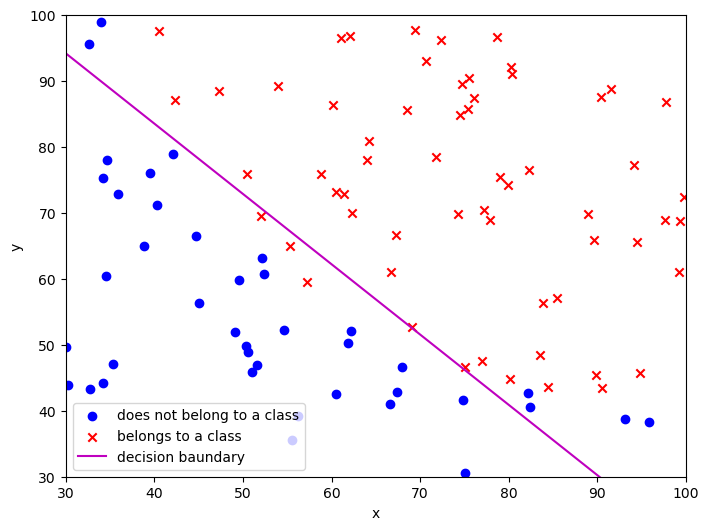

In [9]:
plt.figure(figsize=(8, 6))

plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], color='blue', label='does not belong to a class')
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], color='red', label='belongs to a class', marker='x')


x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db
plt.plot(x1_db, x2_db, '-m', label='decision baundary')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.legend(loc = "lower left")
plt.show()

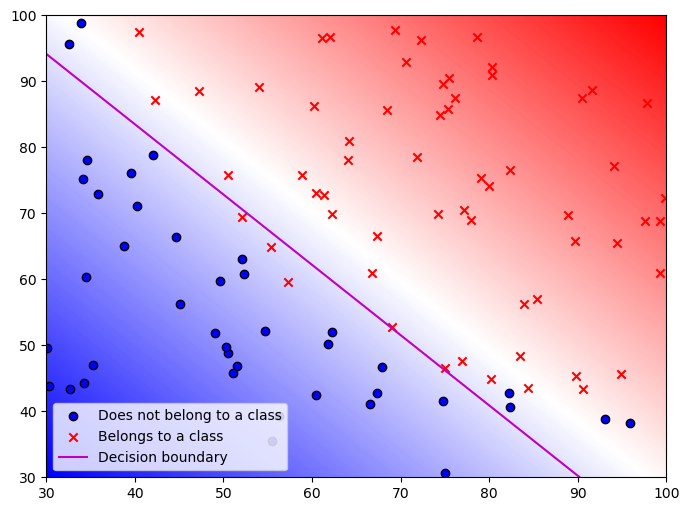

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], c='blue', label='Does not belong to a class', edgecolor='k')  # Add edgecolor for better visibility
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], c='red', marker='x', label='Belongs to a class')

x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0] / theta[2, 0] - theta[1, 0] / theta[2, 0] * x1_db
plt.plot(x1_db, x2_db, '-m', label='Decision boundary')

xx, yy = np.meshgrid(np.linspace(30, 100, 500), np.linspace(30, 100, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

distances = (theta[0, 0] + theta[1, 0] * grid_points[:, 0] + theta[2, 0] * grid_points[:, 1]) / np.sqrt(theta[1, 0]**2 + theta[2, 0]**2)

distances = distances.reshape(xx.shape)

cmap = LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'white', 'red'])

plt.imshow(distances, extent=(30, 100, 30, 100), origin='lower', cmap=cmap, alpha=1, aspect='auto')

plt.xlim((30, 100))
plt.ylim((30, 100))
plt.legend(loc='lower left')

plt.show()

In [35]:
## Zad 3
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

In [36]:
X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)

theta = np.array([[0],[0],[0],[0]], dtype=np.float32)
eps = 1e-9
alpha = 0.01
theta = gradient_descent(X, y, theta, eps, alpha)
theta

array([[-29.68987 ],
       [ 89.2452  ],
       [ 26.474642],
       [-64.      ]], dtype=float32)

<class 'numpy.ndarray'>


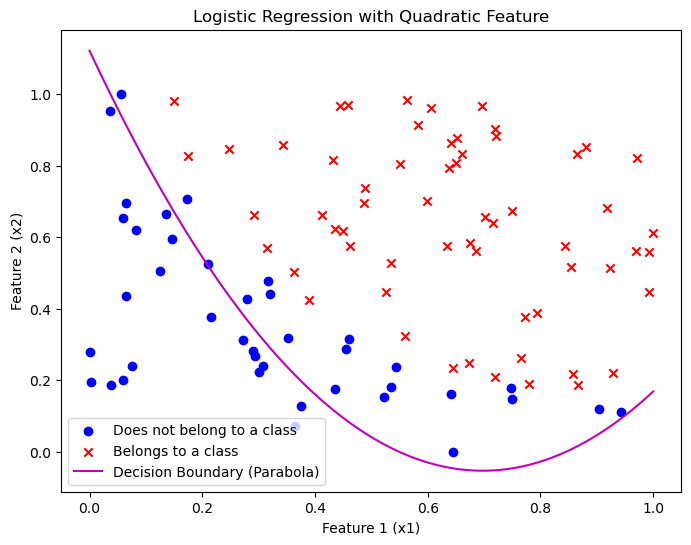

In [37]:
print(type(theta))
# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], c='blue', label='Does not belong to a class')
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], c='red', marker='x', label='Belongs to a class')

# Plot the parabolic decision boundary
x1_db = np.linspace(X[1, :].min(), X[1, :].max(), 100)

# Teraz musimy użyć odpowiedniego indeksowania, ponieważ theta jest wektorem 2D (4,1)
x2_db = - (theta[0, 0] + theta[1, 0] * x1_db + theta[3, 0] * x1_db**2) / theta[2, 0]

# Plot the decision boundary
plt.plot(x1_db, x2_db, '-m', label='Decision Boundary (Parabola)')

# Add labels and legend
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Logistic Regression with Quadratic Feature')
plt.legend(loc='lower left')
plt.show()

In [23]:
#zad 4
data = datasets.load_digits()
y = data['target']
x = data['data']

x, x_test, y, y_test = train_test_split(x, y, random_state=1234)

x.shape
no_of_cls = 10
x_scale = x.max()
m = x.shape[0]
n = x.shape[1]
x.shape

(1347, 64)

In [24]:
theta = []  
eps = 1e-5
alpha = 1e-1

for cls_id in range(no_of_cls):
    print(f'Optymalizacja dla klasy {cls_id}')
    y_cls = (y == cls_id).astype(np.int8)
    y_cls.shape = [1, m]
    
    x_tmp = np.array(x) / x_scale  
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])  
    theta_cls = np.zeros((n+1, 1))

    theta_cls = gradient_descent(X_cls, y_cls, theta_cls, eps, alpha)
    theta.append(theta_cls)

Optymalizacja dla klasy 0
Optymalizacja dla klasy 1
Optymalizacja dla klasy 2
Optymalizacja dla klasy 3
Optymalizacja dla klasy 4
Optymalizacja dla klasy 5
Optymalizacja dla klasy 6
Optymalizacja dla klasy 7
Optymalizacja dla klasy 8
Optymalizacja dla klasy 9


In [25]:
predictions = []
for example_id in range(x_test.shape[0]):
    probabs = np.zeros(no_of_cls)
    
    for cls_id, theta_cls in enumerate(theta):
        x_example = np.array(x_test[example_id]) / x_scale
        X_example = np.concatenate([[1], x_example])
        X_example = X_example[..., np.newaxis]
        probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))

    predictions.append(np.argmax(probabs))

predictions = np.array(predictions)
print(predictions)


[7 9 7 6 0 2 4 3 6 3 7 8 7 9 4 3 1 7 8 4 0 3 9 1 3 6 6 0 5 4 1 2 1 2 3 2 7
 6 4 8 6 4 4 0 9 1 8 5 4 4 4 1 7 6 8 2 9 9 8 0 8 3 1 8 8 1 3 9 1 3 9 6 9 5
 2 1 9 2 1 3 8 7 3 3 1 7 7 5 8 2 6 1 9 1 6 4 5 2 2 4 5 4 7 6 5 7 2 4 1 0 7
 6 1 2 9 5 2 5 0 3 2 7 6 4 9 2 1 1 6 7 6 2 5 4 7 5 0 9 1 0 5 6 7 6 3 8 3 2
 0 4 0 9 5 4 6 1 1 1 6 1 7 9 0 7 9 5 4 1 3 8 6 4 7 1 5 7 4 7 4 3 2 2 1 1 4
 4 3 5 5 9 4 5 5 9 3 9 3 1 2 0 8 2 8 9 2 4 6 8 3 8 1 0 8 1 8 5 6 8 7 1 8 3
 4 9 7 0 5 5 6 1 3 0 5 8 2 0 9 8 6 7 8 4 1 0 5 2 5 1 6 4 7 1 2 6 4 4 6 3 2
 5 2 6 5 2 9 4 7 0 1 0 4 3 1 2 7 9 8 5 9 5 7 0 4 8 4 9 4 0 7 7 7 5 3 5 3 9
 7 5 5 2 7 0 8 9 1 7 9 8 5 0 2 0 8 7 0 9 5 5 9 6 1 2 3 9 1 3 2 9 3 4 3 4 1
 8 1 8 5 0 9 2 7 2 3 5 2 6 3 4 1 5 0 5 4 6 3 2 5 0 7 3 6 0 8 6 0 0 2 2 0 1
 4 6 5 0 9 5 6 8 4 4 2 8 2 9 4 7 3 8 6 3 8 6 4 7 0 6 6 8 3 6 3 8 0 1 6 5 6
 8 2 2 7 6 4 0 0 2 2 9 5 8 6 7 6 4 9 6 7 2 9 2 4 9 1 3 7 8 5 3 4 3 9 1 9 1
 7 2 3 5 8 1]


C:\Users\Tomek\AppData\Local\Temp\ipykernel_5660\3876907242.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))


In [26]:
def compute_confusion_matrix(y_true, y_pred, num_classes=10):
    conf_matrix = np.zeros((num_classes, num_classes), dtype=np.uint32)
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true][pred] += 1

    return conf_matrix


In [27]:
conf_matrix = compute_confusion_matrix(y_test, predictions, num_classes=10)
print("Macierz konfuzji:")
print(conf_matrix)


Macierz konfuzji:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  1  0  0  2]
 [ 0  1 47  0  0  0  0  1  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 1  0  0  0 48  0  0  2  1  0]
 [ 0  0  0  0  1 46  1  0  0  1]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  3  1  0  0  0  1  0 37  1]
 [ 0  0  0  0  0  0  0  2  3 39]]


In [29]:
compute_confusion_matrix(y_test, predictions)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  1,  0,  0,  2],
       [ 0,  1, 47,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 48,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  1, 46,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  1,  0, 37,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  3, 39]], dtype=uint32)

In [30]:
def compute_classification_report(conf_matrix):
    num_classes = conf_matrix.shape[0]
    report = {}

    for i in range(num_classes):
        tp = conf_matrix[i, i]  # True Positives
        fn = np.sum(conf_matrix[i, :]) - tp  # False Negatives
        fp = np.sum(conf_matrix[:, i]) - tp  # False Positives
        support = np.sum(conf_matrix[i, :])  # Liczba wystąpień danej klasy

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

        report[i] = {
            'precision': round(precision, 2),
            'recall': round(recall, 2),
            'f1-score': round(f1_score, 2),
            'support': int(support)
        }

    # Makrośrednie
    precision_avg = np.mean([report[i]['precision'] for i in range(num_classes)])
    recall_avg = np.mean([report[i]['recall'] for i in range(num_classes)])
    f1_score_avg = np.mean([report[i]['f1-score'] for i in range(num_classes)])
    support_total = np.sum([report[i]['support'] for i in range(num_classes)])

    report['macro avg'] = {
        'precision': round(precision_avg, 2),
        'recall': round(recall_avg, 2),
        'f1-score': round(f1_score_avg, 2),
        'support': support_total
    }

    return report

In [31]:
import pandas as pd
report = compute_classification_report(conf_matrix)

df_report = pd.DataFrame(report).transpose()

print(df_report)

           precision  recall  f1-score  support
0               0.97    1.00      0.99     37.0
1               0.90    0.94      0.92     47.0
2               0.98    0.96      0.97     49.0
3               1.00    0.98      0.99     44.0
4               0.98    0.92      0.95     52.0
5               0.98    0.94      0.96     49.0
6               0.93    0.96      0.95     45.0
7               0.89    1.00      0.94     40.0
8               0.88    0.86      0.87     43.0
9               0.91    0.89      0.90     44.0
macro avg       0.94    0.94      0.94    450.0


In [34]:
print(classification_report(y_test, predictions, target_names=[f'{i} class' for i in range(10)]))


              precision    recall  f1-score   support

     0 class       0.97      1.00      0.99        37
     1 class       0.90      0.94      0.92        47
     2 class       0.98      0.96      0.97        49
     3 class       1.00      0.98      0.99        44
     4 class       0.98      0.92      0.95        52
     5 class       0.98      0.94      0.96        49
     6 class       0.93      0.96      0.95        45
     7 class       0.89      1.00      0.94        40
     8 class       0.88      0.86      0.87        43
     9 class       0.91      0.89      0.90        44

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



In [14]:
## Zadanie 4
from sklearn.metrics import confusion_matrix, classification_report
data = datasets.load_digits()
y = data['target']
x = data['data']
x, x_test, y, y_test = train_test_split(x, y, random_state=1234)
no_of_cls = 10
x_scale = x.max()
m = x.shape[0]
n = x.shape[1]

theta = []  # kontener na wagi kolejnych modeli
eps = 1e-5
alpha = 1e-1
for cls_id in range(no_of_cls):
    print(f'Optymalizacja dla klasy {cls_id}')
    y_cls = (y == cls_id).astype(np.int8)  # utworzenie macierzy y dla klasy cls_id
    y_cls.shape = [1, m]
    x_tmp = np.array(x) / x_scale  # skalowanie danych, wystarczy podzielić przez maksymalną jasność w zbiorze
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])  # utworzenie macierzy X
    theta_cls = np.zeros((n+1, 1)) 
 
    prev_cost = calculate_cost(X_cls, y_cls, theta_cls)
    while True:
        # optymalizacja wag theta
        current_cost = calculate_cost(X_cls, y_cls, theta_cls)
 
        if math.fabs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost
    print(f'Koszt dla klasy {cls_id}: {current_cost}.')
    theta.append(theta_cls)




Optymalizacja dla klasy 0
Koszt dla klasy 0: 0.6931471805599454.
Optymalizacja dla klasy 1
Koszt dla klasy 1: 0.6931471805599454.
Optymalizacja dla klasy 2
Koszt dla klasy 2: 0.6931471805599454.
Optymalizacja dla klasy 3
Koszt dla klasy 3: 0.6931471805599454.
Optymalizacja dla klasy 4
Koszt dla klasy 4: 0.6931471805599454.
Optymalizacja dla klasy 5
Koszt dla klasy 5: 0.6931471805599454.
Optymalizacja dla klasy 6
Koszt dla klasy 6: 0.6931471805599454.
Optymalizacja dla klasy 7
Koszt dla klasy 7: 0.6931471805599454.
Optymalizacja dla klasy 8
Koszt dla klasy 8: 0.6931471805599454.
Optymalizacja dla klasy 9
Koszt dla klasy 9: 0.6931471805599454.


In [15]:
## zadanie 5
import cv2
from scipy.fft import fft2, ifft2
from sklearn.preprocessing import StandardScaler

# Funkcja do detekcji krawędzi
def detect_edges(image):
    # Przekształcenie obrazu na typ uint8 (w odcieniach szarości)
    image = np.uint8(image * 255)  # Skaling do zakresu 0-255
    return cv2.Canny(image, 100, 200)
# Funkcja do obliczania średniej jasności obrazu
def mean_brightness(image):
    return np.mean(image)

# Funkcja do obliczania cech częstotliwościowych (FFT)
def frequency_features(image):
    # Przeprowadzamy transformację Fouriera
    f_transform = fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)  # Przesunięcie częstotliwości
    magnitude = np.abs(f_transform_shifted)
    return magnitude.flatten()

# Wczytanie danych
data = datasets.load_digits()
y = data['target']
X = data['data']

# Podział na zbiór uczący i testowy
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Przygotowanie nowych cech
def extract_features(X_raw):
    features = []
    for img in X_raw:
        img_reshaped = img.reshape(8, 8)  # Przekształcenie obrazu w macierz 8x8
        
        # Cechy:
        edges = detect_edges(img_reshaped)
        mean_brightness_value = mean_brightness(img_reshaped)
        frequency_feats = frequency_features(img_reshaped)
        
        # Łączenie cech: krawędzie, średnia jasność i cechy częstotliwościowe
        feature_vector = np.concatenate([edges.flatten(), [mean_brightness_value], frequency_feats])
        features.append(feature_vector)
    
    return np.array(features)

# Ekstrakcja nowych cech z danych treningowych i testowych
x_train_new = extract_features(x_train)
x_test_new = extract_features(x_test)

# Standaryzacja nowych cech
scaler = StandardScaler()
x_train_new = scaler.fit_transform(x_train_new)
x_test_new = scaler.transform(x_test_new)

# Parametry
no_of_cls = 10  # Liczba klas (cyfry 0-9)
m_train = x_train_new.shape[0]  # Liczba przykładów w zbiorze treningowym
n = x_train_new.shape[1]  # Liczba cech

# Lista do przechowywania wag
theta = []

# Uczenie modeli regresji logistycznej dla każdej z klas (0-9)
eps = 1e-5
alpha = 1e-1
for cls_id in range(no_of_cls):
    print(f'Optymalizacja dla klasy {cls_id}')
    y_cls = (y_train == cls_id).astype(np.int8)  # Utworzenie macierzy y dla klasy cls_id
    y_cls.shape = [1, m_train]
    
    x_tmp = np.array(x_train_new)  # Skalowanie danych już z nowymi cechami
    X_cls = np.concatenate([np.ones((1, m_train)), x_tmp.T])  # Dodanie kolumny jedynek (bias)
    
    theta_cls = np.zeros((n+1, 1))  # Inicjalizacja wag
    
    prev_cost = calculate_cost(X_cls, y_cls, theta_cls)
    while True:
        # Optymalizacja wag theta (gradient descent)
        current_cost = calculate_cost(X_cls, y_cls, theta_cls)
        
        if math.fabs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost
        
    print(f'Koszt dla klasy {cls_id}: {current_cost}.')
    theta.append(theta_cls)

# Predykcja na zbiorze testowym
y_pred_new = []

for i in range(x_test_new.shape[0]):
    probabs = np.zeros(no_of_cls)
    x_example = np.array(x_test_new[i])  # Skalowanie już wykonane
    X_example = np.array([1, *x_example])  # Dodanie biasu
    
    for cls_id, theta_cls in enumerate(theta):
        probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))  # Obliczanie prawdopodobieństwa
    
    pred = np.argmax(probabs)  # Wybór klasy z najwyższym prawdopodobieństwem
    y_pred_new.append(pred)

# Obliczanie macierzy konfuzji
cm_new = confusion_matrix(y_test, y_pred_new)
print("Macierz konfuzji dla nowych cech:")
print(cm_new)

# Raport klasyfikacji
report_new = classification_report(y_test, y_pred_new)
print("Raport klasyfikacji dla nowych cech:")
print(report_new)

Optymalizacja dla klasy 0
Koszt dla klasy 0: 0.6931471805599453.
Optymalizacja dla klasy 1
Koszt dla klasy 1: 0.6931471805599453.
Optymalizacja dla klasy 2
Koszt dla klasy 2: 0.6931471805599453.
Optymalizacja dla klasy 3
Koszt dla klasy 3: 0.6931471805599453.
Optymalizacja dla klasy 4
Koszt dla klasy 4: 0.6931471805599453.
Optymalizacja dla klasy 5
Koszt dla klasy 5: 0.6931471805599453.
Optymalizacja dla klasy 6
Koszt dla klasy 6: 0.6931471805599453.
Optymalizacja dla klasy 7
Koszt dla klasy 7: 0.6931471805599453.
Optymalizacja dla klasy 8
Koszt dla klasy 8: 0.6931471805599453.
Optymalizacja dla klasy 9
Koszt dla klasy 9: 0.6931471805599453.
Macierz konfuzji dla nowych cech:
[[53  0  0  0  0  0  0  0  0  0]
 [64  0  0  0  0  0  0  0  0  0]
 [58  0  0  0  0  0  0  0  0  0]
 [60  0  0  0  0  0  0  0  0  0]
 [71  0  0  0  0  0  0  0  0  0]
 [68  0  0  0  0  0  0  0  0  0]
 [57  0  0  0  0  0  0  0  0  0]
 [55  0  0  0  0  0  0  0  0  0]
 [55  0  0  0  0  0  0  0  0  0]
 [53  0  0  0  0  0

C:\Users\Tomek\AppData\Local\Temp\ipykernel_5660\3860922619.py:99: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))  # Obliczanie prawdopodobieństwa
c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi